# Determinental Point Process (DPP)

This simple notebook demonstrates how to draw random samples from a FiniteDPP process defined by a square exponential similarity kernel with different values of lenght_scale and prefactor. 

We also compute the log_probability of the generated samples.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import genus as gn

length_scale ->  20, prefactor -> 0.100,                n_sample ->     3, log_prob -> -17.720615
length_scale ->  20, prefactor -> 1.000,                n_sample ->     6, log_prob -> -30.117783
length_scale ->  20, prefactor -> 5.000,                n_sample ->     7, log_prob -> -32.128384
length_scale ->  20, prefactor -> 10.000,                n_sample ->     7, log_prob -> -29.892311
length_scale ->  10, prefactor -> 0.100,                n_sample ->     5, log_prob -> -24.082760
length_scale ->  10, prefactor -> 1.000,                n_sample ->     9, log_prob -> -38.540089
length_scale ->  10, prefactor -> 5.000,                n_sample ->    11, log_prob -> -43.883831
length_scale ->  10, prefactor -> 10.000,                n_sample ->    16, log_prob -> -67.451736
length_scale ->   5, prefactor -> 0.100,                n_sample ->     7, log_prob -> -35.266594
length_scale ->   5, prefactor -> 1.000,                n_sample ->    21, log_prob -> -77.934204
length_scale ->   

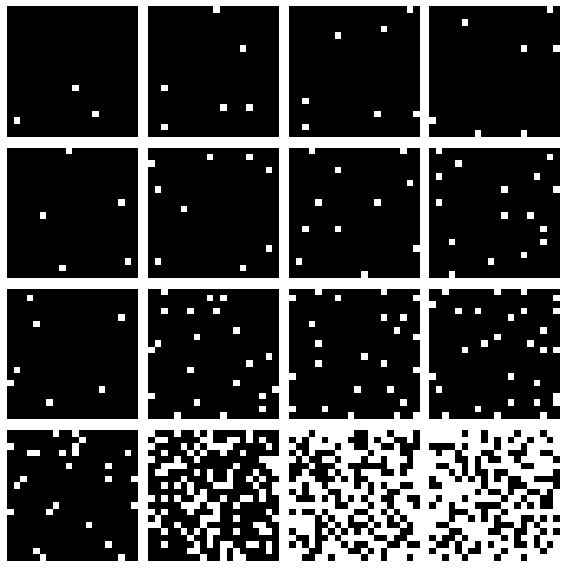

In [17]:
fig, ax =  plt.subplots(ncols=4, nrows=4, figsize=(8,8))
for r, length_scale in enumerate([20,10,5,1]):
    for c, prefactor in enumerate([0.1, 1, 5, 10]):
        KERNEL = gn.SimilarityKernel(length_scale=length_scale, weight=prefactor)
        likelihood_matrix = KERNEL.forward(n_width=20, n_height=20)
        DPP = gn.FiniteDPP(L=likelihood_matrix)
        value = DPP.sample(sample_shape=torch.Size([1]))  # draw one random samples
        n_samples = value.sum(dim=-1).item()
        logp = DPP.log_prob(value=value).item()       
        mask = KERNEL.sample_2_mask(value)
        # print("value.shape, mask.shape ->",value.shape, mask.shape)
        print("length_scale -> {0:3d}, prefactor -> {1:.3f}, \
               n_sample -> {2:5d}, log_prob -> {3:.6f}".format(length_scale, prefactor, n_samples, logp))
        
        ax[r,c].axis('off')
        ax[r,c].imshow(mask[0], cmap='gray')
fig.tight_layout()
fig.savefig("./DPP_samples.png")